## Loading Data and Preprocessing
Here We are loading the CSV file and checking the structure of the data to understand what we’re working with. We'll look at the differentrows, column names, and any missing values.

In [13]:
import pandas as pd

# Load our dataset
df = pd.read_csv("Agora.csv", on_bad_lines='skip')

df.head()


,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN


We loaded our dataset which was in the  Agora.csv file using pandas. The dataset includes various listings from the Agora dark web marketplace, and we are focusing on structured columns like Category, Price, Rating, Origin, and Destination.
From this preview, we can see that some columns contain missing values, and the Price and Rating columns are in text format and will need cleaning.

In [14]:
# looking at the column names and data types
df.info()

# Checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109689 entries, 0 to 109688
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Vendor             109689 non-null  object
 1    Category          109689 non-null  object
 2    Item              109685 non-null  object
 3    Item Description  109662 non-null  object
 4    Price             109684 non-null  object
 5    Origin            99807 non-null   object
 6    Destination       60528 non-null   object
 7    Rating            109674 non-null  object
 8    Remarks           12616 non-null   object
dtypes: object(9)
memory usage: 7.5+ MB


Vendor                   0
 Category                0
 Item                    4
 Item Description       27
 Price                   5
 Origin               9882
 Destination         49161
 Rating                 15
 Remarks             97073
dtype: int64

So our dataset contains 109,689 rows and 9 columns. Every column is stored as a string (object), including numeric fields like Price and Rating, so we still  need to convert them. We can also see that there are some missing values, especially:

* Destination: ~45% missing

* Origin: ~9% missing

* Rating: only 15 missing

* Remarks: mostly empty and we not be using it so we will ignore this field

To prepare the data for machine learning, we will clean the data next, including:

Removing rows with missing essential values (like Category, Price, or Rating) and then convert Price and Rating to numeric format. We will aslo remove outliers (prices > 0.5 BTC). This wil help us filter to relevant features,

In [18]:
# Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()
# Drop rows with missing fields/ values in "Category", "Price", and "Rating"
df_clean = df.dropna(subset=["Category", "Price", "Rating"])

# Remove " BTC" and convert Price to float
df_clean["Price"] = df_clean["Price"].str.replace(" BTC", "", regex=False)
df_clean = df_clean[df_clean["Price"].str.match(r'^[\d\.]+$')]  # Keep only numeric values
df_clean["Price"] = df_clean["Price"].astype(float)

# Convert Rating to float
df_clean["Rating"] = df_clean["Rating"].str.extract(r'([\d\.]+)').astype(float)

# Drop extreme prices > 0.5 BTC
df_clean = df_clean[df_clean["Price"] <= 0.5]

# looking at the head of our cleaned data
df_clean[["Category", "Price", "Rating", "Origin", "Destination"]].head()



/var/folders/vf/3fzwlf6j5mgdhdjvjh9z2g5w0000gn/T/ipykernel_2911/354302747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Price"] = df_clean["Price"].str.replace(" BTC", "", regex=False)


,Category,Price,Rating,Origin,Destination
0,Services/Hacking,0.050270,4.96,Torland,NaN
1,Services/Hacking,0.152420,4.96,Torland,NaN
2,Services/Hacking,0.007000,4.93,Torland,NaN
3,Services/Hacking,0.019017,4.89,NaN,NaN
4,Services/Hacking,0.062018,4.88,Torland,NaN


Some rows in the dataset were not in the format we wanted due to unescaped commas or quotes or having strings in teh price columns. So We reloaded the dataset using on_bad_lines='skip' to  skip problematic rows. Then, we filtered out non-numeric entries in the Price column before converting it to float.
Now our dataset is cleaned and ready for encoding.

In [24]:
# veiewing the different categories
df_clean["Category"].unique()


array(['Services/Hacking', 'Services/Other', 'Drugs/RCs',
       'Forgeries/Physical documents', 'Tobacco/Smoked', 'Services/Money',
       'Counterfeits/Money', 'Data/Software', 'Data/Accounts',
       'Counterfeits/Clothing', 'Information/eBooks', 'Electronics',
       'Drug paraphernalia/Pipes', 'Drugs/Weight loss', 'Data/Pirated',
       'Drugs/Steroids', 'Drugs/Prescription', 'Information/Guides',
       'Forgeries/Scans/Photos', 'Other', 'Jewelry', 'Drugs/Other',
       'Counterfeits/Accessories', 'Counterfeits/Watches',
       'Drugs/Cannabis/Weed', 'Drugs/Benzos', 'Drugs/Cannabis/Shake/trim',
       'Drugs/Cannabis/Synthetics', 'Drugs/Cannabis/Concentrates',
       'Drugs/Cannabis/Seeds', 'Drugs/Cannabis/Hash',
       'Drugs/Dissociatives/MXE', 'Drugs/Dissociatives/Ketamine',
       'Drugs/Cannabis/Edibles', 'Drugs/Ecstasy/Pills',
       'Drugs/Ecstasy/Other', 'Drugs/Stimulants/Meth',
       'Drugs/Psychedelics/LSD', 'Drugs/Stimulants/Speed',
       'Drugs/Dissociatives/GHB', '

Maybe we have to go ahead and catgeories each of thes ecatgories closer or more broad to each other...all together so it makes teh classifcation easier.

Lets look at listings per category

Category
Drugs/Cannabis/Weed                               10585
Drugs/Prescription                                 4001
Drugs/Benzos                                       3264
Drugs/Ecstasy/Pills                                3209
Drugs/Ecstasy/MDMA                                 2414
                                                  ...  
Weapons/Fireworks                                    14
Info/eBooks/Aliens/UFOs                               8
Services/Travel                                       7
Drug paraphernalia/Injecting equipment/Filters        6
Forgeries                                             5
Name: count, Length: 103, dtype: int64


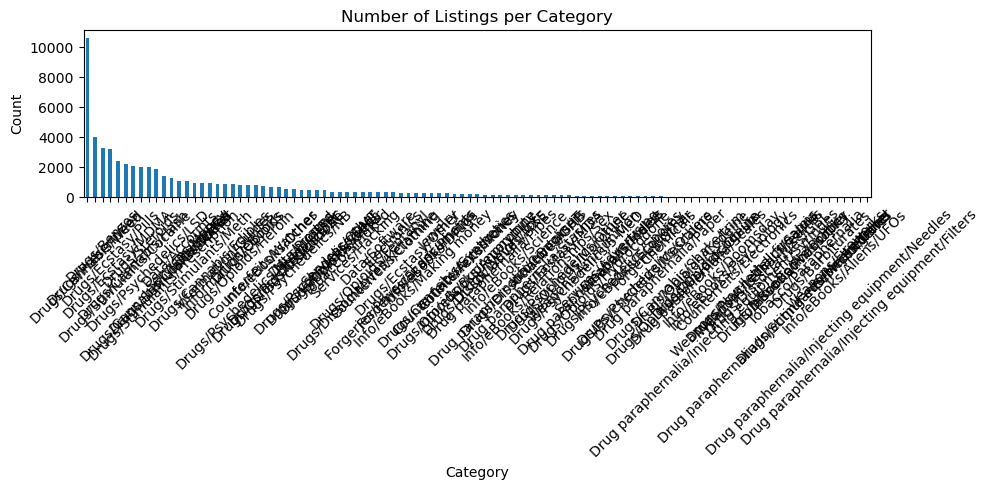

In [19]:
# Count of listings per category
category_counts = df_clean["Category"].value_counts()
print(category_counts)

# Bar plot of category distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar')
plt.title("Number of Listings per Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


lets look at price distribution by category

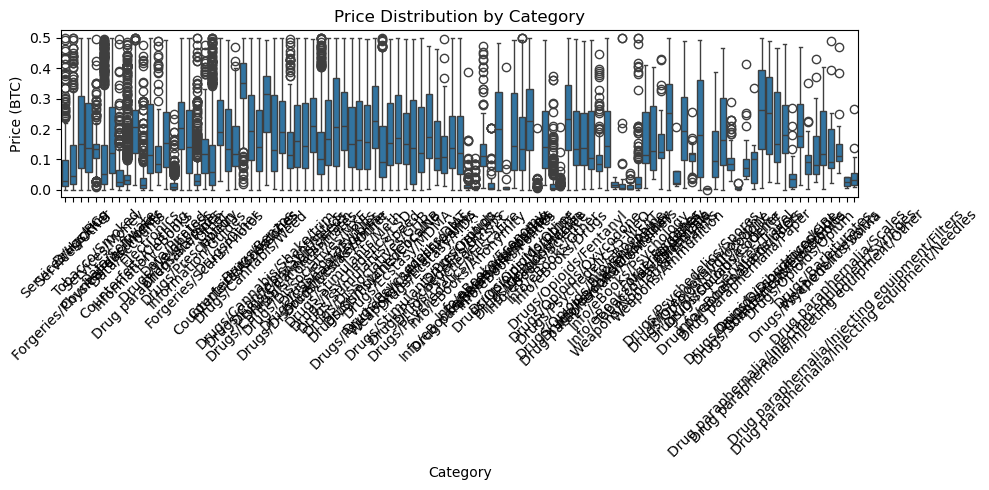

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x="Category", y="Price")
plt.title("Price Distribution by Category")
plt.ylabel("Price (BTC)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


avg rating by category

Category
Info/eBooks/Doomsday                              4.989070
Weapons/Non-lethal firearms                       4.981128
Info/eBooks/Science                               4.974656
Info/eBooks/Relationships/Sex                     4.973972
Drug paraphernalia/Grinders                       4.965057
                                                    ...   
Counterfeits/Accessories                          3.655095
Drugs/Stimulants/Mephedrone                       3.622105
Forgeries                                         3.560000
Drug paraphernalia/Injecting equipment/Filters    3.495833
Chemicals                                         2.011068
Name: Rating, Length: 103, dtype: float64


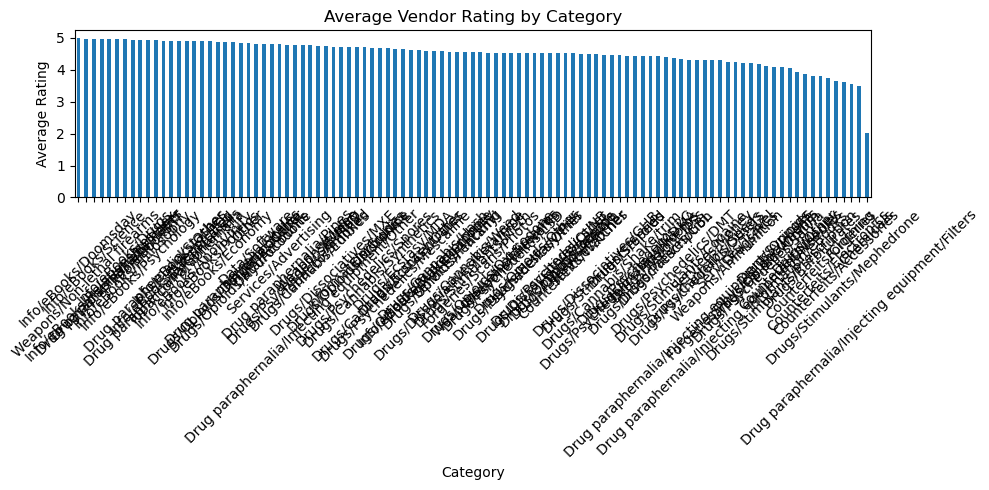

In [21]:
# Group and sort average rating by category
avg_rating = df_clean.groupby("Category")["Rating"].mean().sort_values(ascending=False)
print(avg_rating)

# Bar plot of average rating by category
avg_rating.plot(kind='bar', figsize=(10, 5))
plt.title("Average Vendor Rating by Category")
plt.ylabel("Average Rating")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Top Origins
print("Top Origins:")
print(df_clean["Origin"].value_counts().head(10))

# Top Destinations
print("\nTop Destinations:")
print(df_clean["Destination"].value_counts().head(10))

Top Origins:
Origin
USA            18425
UK              7011
Australia       4330
Germany         4001
Netherlands     3471
EU              2853
Canada          2479
Torland         2278
China           1597
Internet        1172
Name: count, dtype: int64

Top Destinations:
Destination
USA           7930
Worldwide     6456
Australia     1704
UK            1418
EU            1391
worldwide     1241
WORLDWIDE     1224
World          747
Europe         654
Everywhere     472
Name: count, dtype: int64


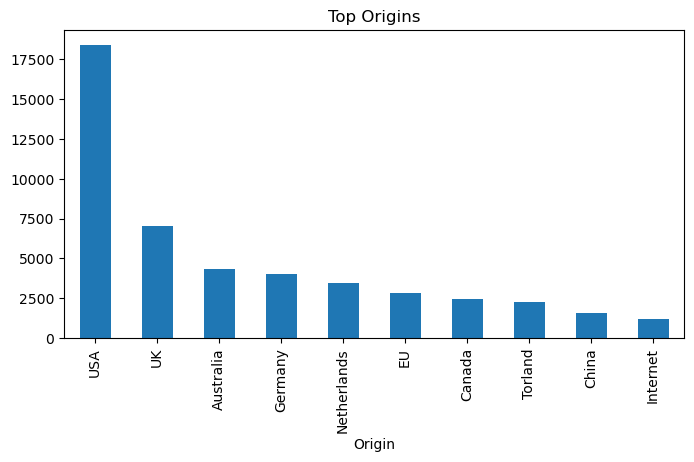

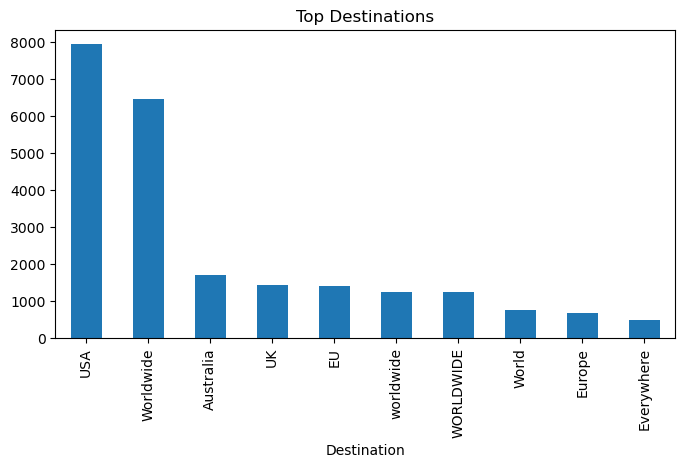

In [23]:
df_clean["Origin"].value_counts().head(10).plot(kind='bar', title="Top Origins", figsize=(8,4))
plt.show()

df_clean["Destination"].value_counts().head(10).plot(kind='bar', title="Top Destinations", figsize=(8,4))
plt.show()

[Paper on darkweb amd deep learning](https://arxiv.org/pdf/2306.07980)